As part of your duties as senior data scientist for the famous ThomasTrain company, you are assigned to understand the satisfaction of the customers even without a direct evaluation. 
To accomplish this task, the company provided you with the “trains_dataset.csv”.
 Understanding the customers’ satisfaction will help the marketing team to effectively target users with promotions and making the retention higher.


Assignment:
- Perform an Explanatory data analysis (EDA) with visualization;
- Generate a training and test set. The test set should be used only at the end;
- Preprocess the dataset (remove outliers, impute missing values, encode categorical features with one hot encoding, not necessarily in this order). Your goal is to estimate whether a customer is satisfied;
- Define whether this is a regression, classification or clustering problem, explain why and choose your model design accordingly. Test at least 3 different models. First, create a validation set from the training set to analyze the behaviour with the default hyperparameters. Then use cross-validation to find the best set of hyperparameters. You must describe every hyperparameter tuned (the more, the better);
- Select the best architecture using the right metric;
- Finally, compute the performances of the test set.


# Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

# Reading the input file

In [3]:
df_trains = pd.read_csv('trains.csv')

# EDA

EDA stands for Exploratory Data Analysis. It's an initial phase in the data analysis process where you explore and summarize key characteristics, patterns, and relationships in a dataset. The primary goal of EDA is to understand the data, gain insights, and prepare for further analysis or modeling.

# 1) Understanding the dataset

### 1.1) General overview of the dataset

Using the function *.head()*, we can extract from the dataset the first x columns (x=5 by default, but we can change this number). They are not useful for analytic purposes, but still enable us to visualize the dataset.

In [4]:
df_trains.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


### 1.2) Showing the dimension of the dataset

The dataset has 129880 rows and 25 columns

In [5]:
df_trains.shape  # outputs number of rows x number of columns

(129880, 25)

### 1.3) Gathering information from data

The visulaization *.info()* let us notice that almost every column has complete informations (hence, 0 null values), only 'Arrival delay in Minutes' column has some missing values.

Moreover we can see that among 25 variables, only 6 are categorical, while 19 are numerical.

In [6]:
df_trains.info()  # outputs column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Legroom Service Rating         129880 non-null  int64  
 1   Onboard General Rating         129880 non-null  int64  
 2   Food'n'Drink Rating            129880 non-null  int64  
 3   Age                            129880 non-null  int64  
 4   Departure Arrival Time Rating  129880 non-null  int64  
 5   Onboard WiFi Rating            129880 non-null  int64  
 6   Ticket ID                      129880 non-null  int64  
 7   Checkin Rating                 129880 non-null  int64  
 8   Track Location Rating          129880 non-null  int64  
 9   Baggage Handling Rating        129880 non-null  int64  
 10  Arrival Delay in Minutes       129487 non-null  float64
 11  Ticket Class                   129880 non-null  object 
 12  Loyalty                       

### 1.4) Handling missing values

Even though it seems like a data cleaning task, our approach in EDA involves addressing missing values to facilitate data plotting and enhance visualization. Specifically, our method for handling missing values involves replacing them with the mode.

Our aim is to retain maximum information for model accuracy, avoiding deletion of rows or columns. This approach ensures a more comprehensive dataset, supporting the development of a more precise model.

In [7]:
# Check for missing values

missing_values = df_trains.isnull().sum()
missing_values

Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64

In particular, from this visualization, we notice that 'Arrival Delay in minutes' column has 393 missing values.

In [8]:
for column in df_trains.columns:
    df_trains[column].fillna(df_trains[column].mode()[0], inplace=True)
df_trains.isnull().sum()

Legroom Service Rating           0
Onboard General Rating           0
Food'n'Drink Rating              0
Age                              0
Departure Arrival Time Rating    0
Onboard WiFi Rating              0
Ticket ID                        0
Checkin Rating                   0
Track Location Rating            0
Baggage Handling Rating          0
Arrival Delay in Minutes         0
Ticket Class                     0
Loyalty                          0
Gender                           0
Boarding Rating                  0
Online Booking Rating            0
Satisfied                        0
Onboard Entertainment Rating     0
Date and Time                    0
Distance                         0
Seat Comfort Rating              0
Work or Leisure                  0
Departure Delay in Minutes       0
Onboard Service Rating           0
Cleanliness Rating               0
dtype: int64

We used a single *for* loop, that iterates over the columns of the dataframe and replaces the missing rows of each column with its mode. Using the command *.isnull().sum()*, we notice that there are no longer columns containing missing values.

### 1.5) Relevant features of numeric variables

Using the *.describe()* function offers a comprehensive overview of key statistics for each numerical variable. This includes essential metrics like mean, standard deviation, quartiles, as well as minimum and maximum values, providing insights into the distribution and central tendency of the data.

In [9]:
# Explore basic statistics

summary_stats = df_trains.describe()
summary_stats

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,Boarding Rating,Online Booking Rating,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,1.298800e+05,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,3.350878,3.642193,3.204774,39.427957,3.057599,2.728696,5.494025e+06,3.306267,2.976925,3.632114,15.045465,3.252633,2.756876,3.358077,1190.316392,3.441361,14.713713,3.383023,3.286326
std,1.316252,1.176669,1.329933,15.119360,1.526741,1.329340,2.596965e+06,1.266185,1.278520,1.180025,38.416353,1.350719,1.401740,1.334049,997.452477,1.319289,38.071126,1.287099,1.313682
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000025e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,27.000000,2.000000,2.000000,3.239218e+06,3.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,414.000000,2.000000,0.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,40.000000,3.000000,3.000000,5.495646e+06,3.000000,3.000000,4.000000,0.000000,3.000000,3.000000,4.000000,844.000000,4.000000,0.000000,4.000000,3.000000
75%,4.000000,5.000000,4.000000,51.000000,4.000000,4.000000,7.739715e+06,4.000000,4.000000,5.000000,13.000000,4.000000,4.000000,4.000000,1744.000000,5.000000,12.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,85.000000,5.000000,5.000000,9.999975e+06,5.000000,5.000000,5.000000,1584.000000,5.000000,5.000000,5.000000,4983.000000,5.000000,1592.000000,5.000000,5.000000


This overview allows us to emphasize certain observations. Within these, we discover that:
- Most ratings tend to cluster around the middle values (around 3 to 4), suggesting a moderate to satisfactory experience in these aspects;
- The age distribution spans from 7 to 85 years and the average age is approximately 39 years, with a standard deviation of around 15 years. The majority of travelers fall between 27 to 51 years old, covering the interquartile range (25th to 75th percentile).;
- The standard deviations for most ratings are noticeable (ranging between 1.18 to 1.53), indicating some variability in passengers' experiences. This variability implies differing opinions or experiences among passengers, leading to a spread in ratings.

In summary, the dataset reflects a range of customer experiences across different service aspects, with generally moderate to satisfactory ratings, some variability in opinions, and a diverse age group of travelers. There don't seem to be extreme outliers in the provided statistics, suggesting a generally consistent range of ratings and ages without significant anomalies.

### 1.6) Insights on categorical variables

In [10]:
# Assuming 'df' is your DataFrame
categorical_count = df_trains.select_dtypes(include='object').shape[1]
print(f"Number of categorical features: {categorical_count}")

Number of categorical features: 6


Through the function *.info()* we found out that among the 25 variabes, 6 of them were categorical.
The latter are the following: 
- Ticket class
- Loyalty
- Gender
- Date and time
- Satisfied
- Work or leisure


### Insights of *Ticket class*

In [11]:
df_trains['Ticket Class'].value_counts() # how many times each unique ticket class appears

Premium    62160
Economy    58309
Smart       9411
Name: Ticket Class, dtype: int64

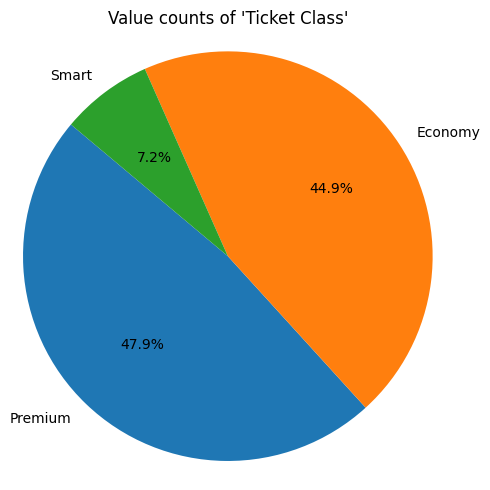

In [12]:
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
ticket_class_counts = df_trains['Ticket Class'].value_counts()

plt.pie(ticket_class_counts, labels=ticket_class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Value counts of 'Ticket Class'")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


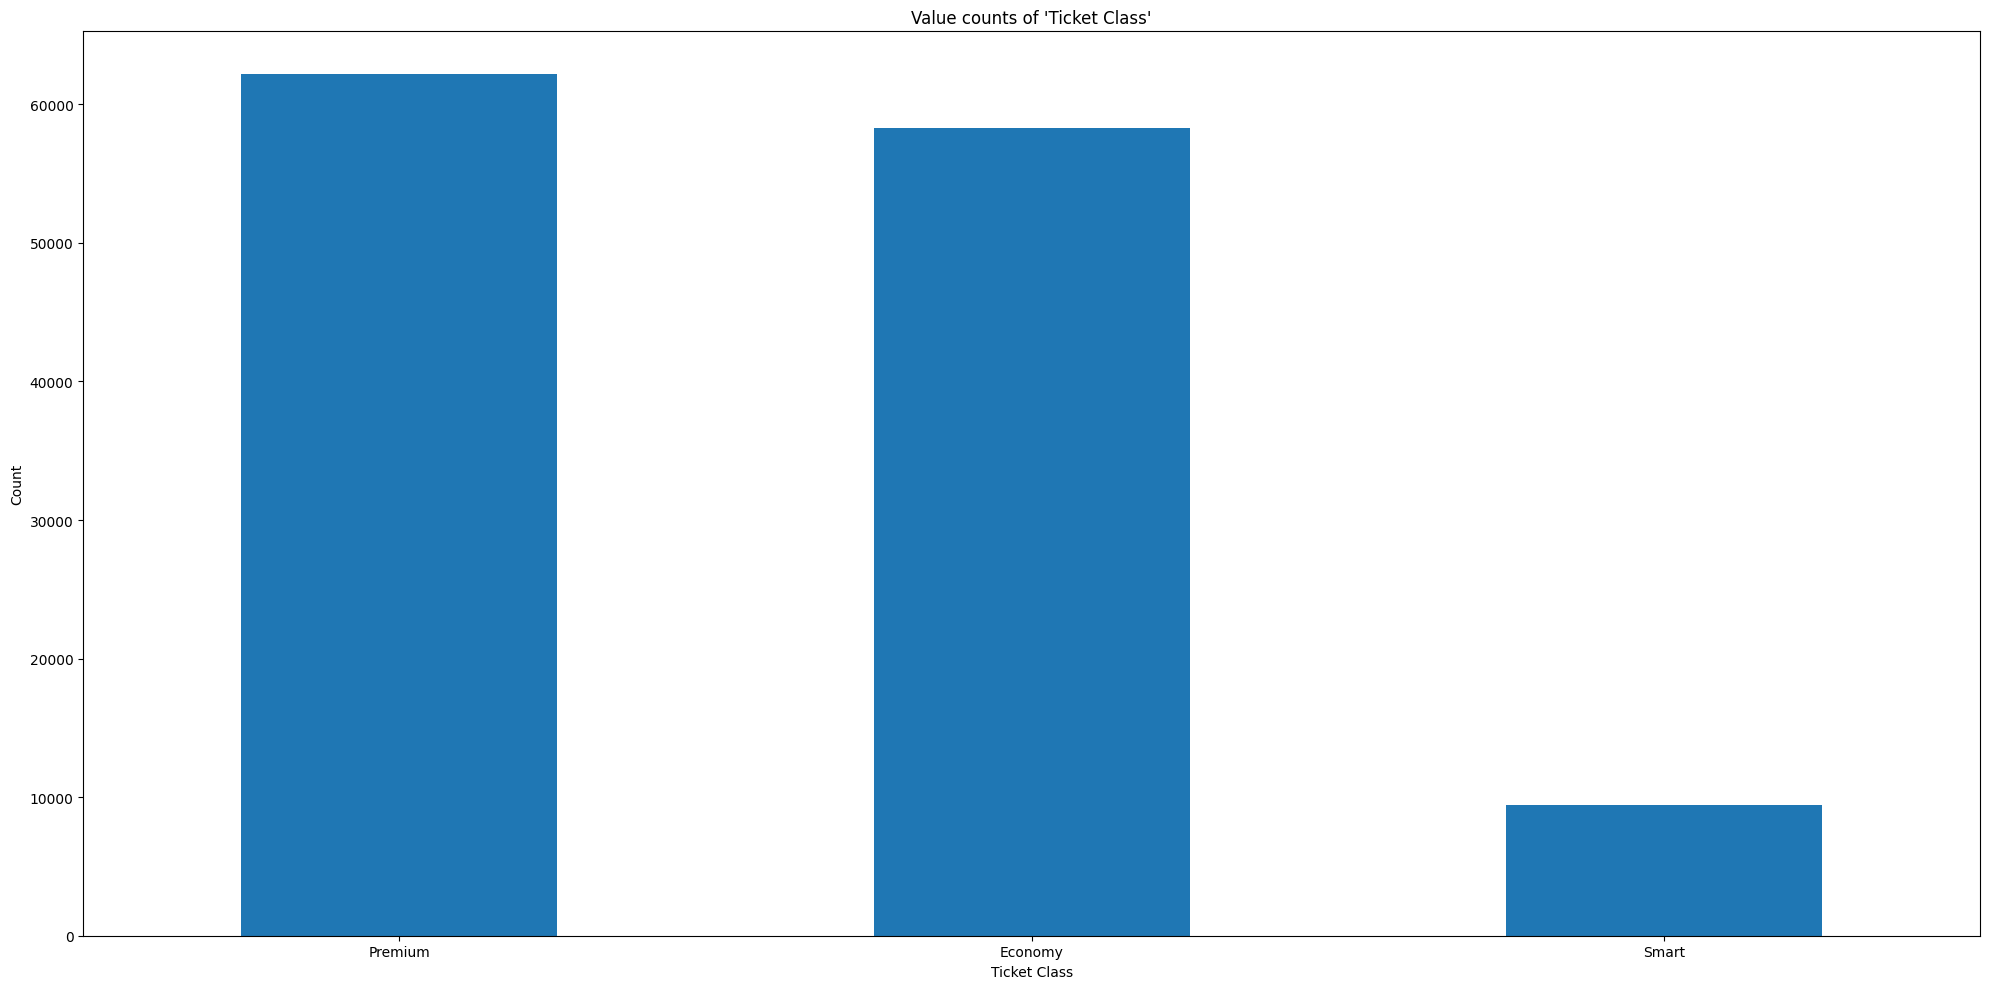

In [13]:
plt.figure(figsize=(20,10))
df_trains['Ticket Class'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Ticket Class'")
plt.xlabel("Ticket Class")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Even though 'Premium' and 'Economy' are really balanced, the 'Smart' option is significantly less choosen.

### Insights of *Loyalty*

In [14]:
df_trains['Loyalty'].value_counts() 

Loyal       106100
Disloyal     23780
Name: Loyalty, dtype: int64

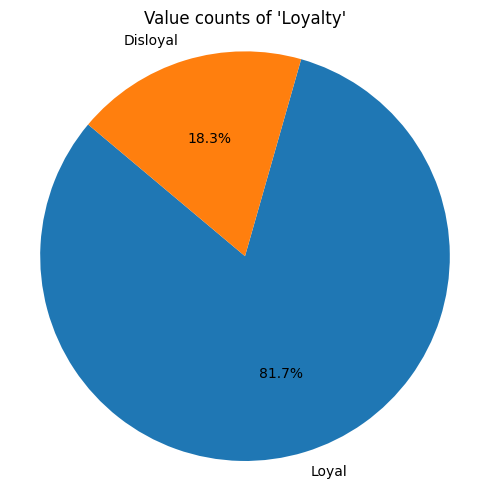

In [15]:
plt.figure(figsize=(5,5))  # Adjust the figure size as needed
loyalty_counts = df_trains['Loyalty'].value_counts()

plt.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Value counts of 'Loyalty'")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

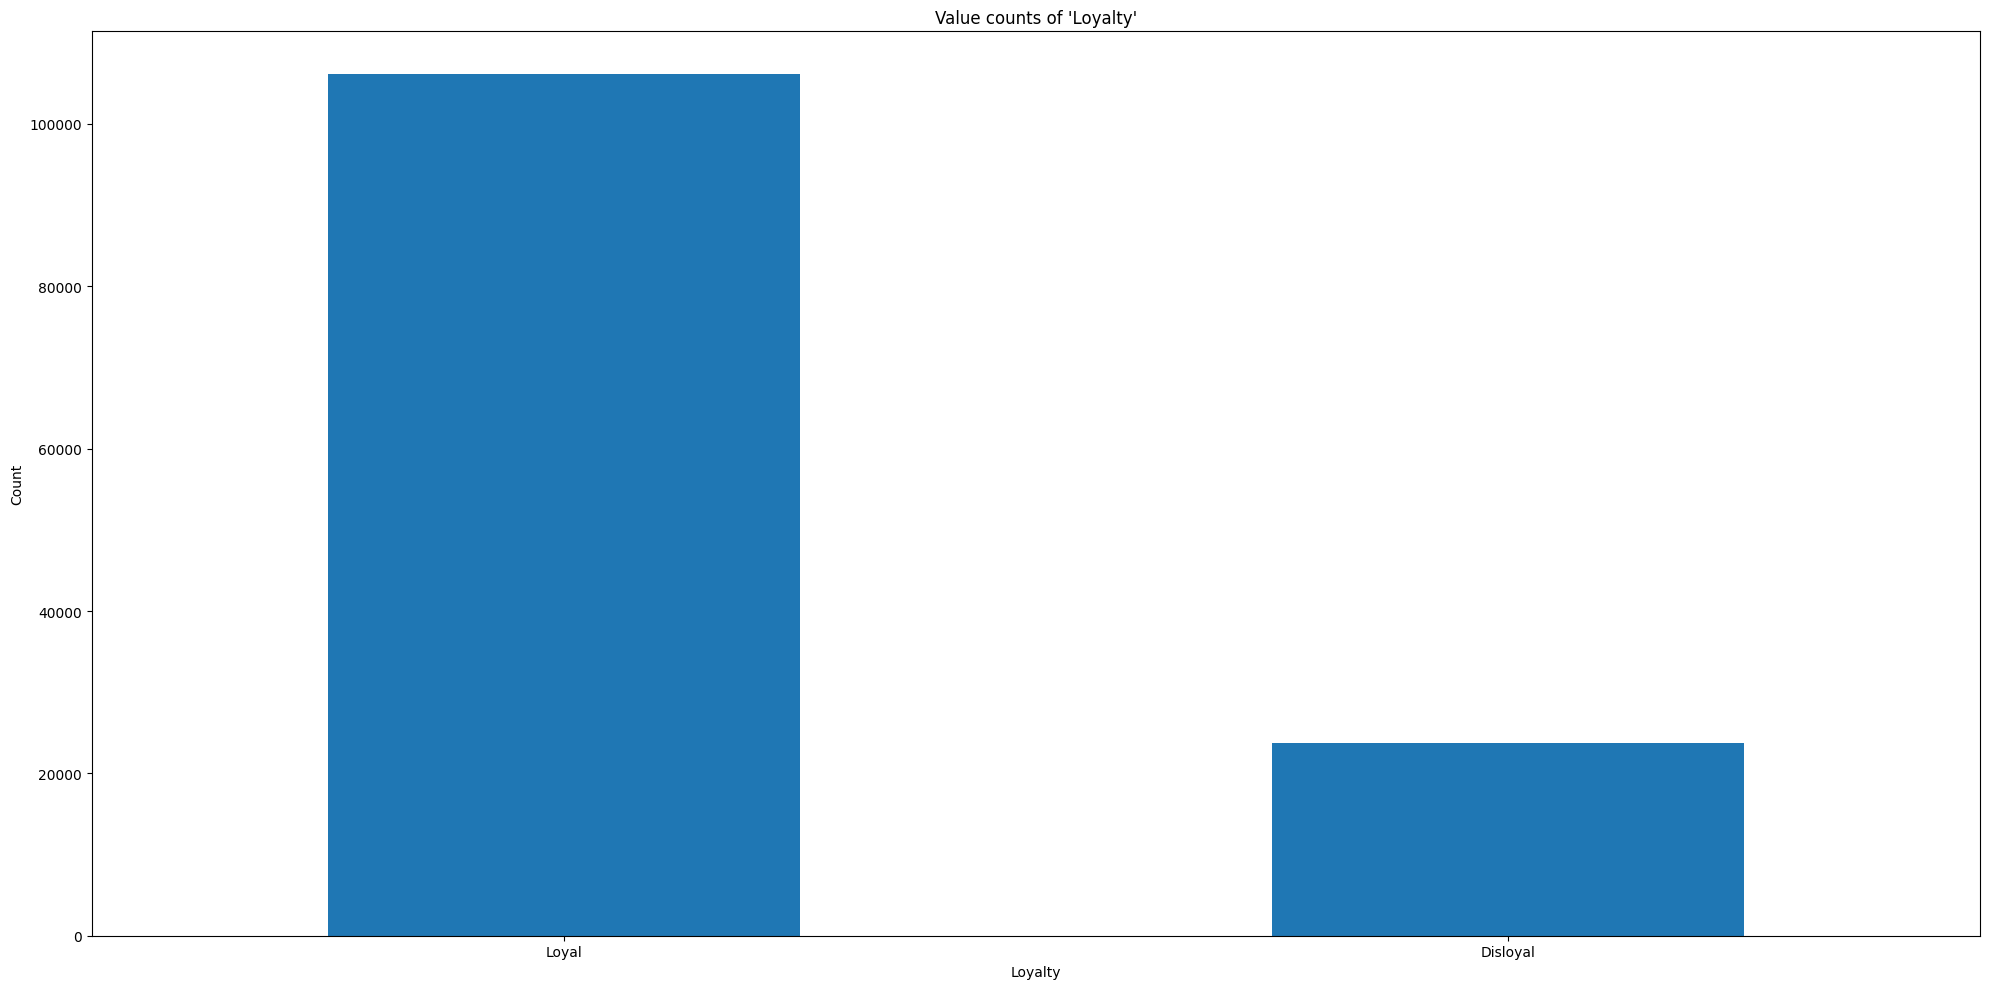

In [16]:
plt.figure(figsize=(20,10))
df_trains['Loyalty'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Loyalty'")
plt.xlabel("Loyalty")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

From this point of view the dataset is realli unbalanced since the 'Loyal' count is about 4 times higher than the 'Disloyal' one.

### Insights of *Gender*

In [17]:
df_trains['Gender'].value_counts()

F    65899
M    63981
Name: Gender, dtype: int64

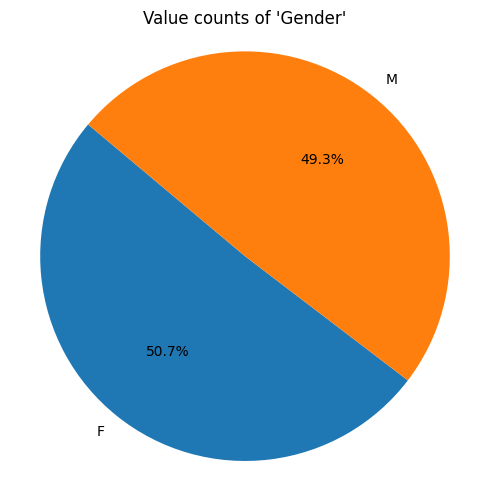

In [18]:
plt.figure(figsize=(5,5))  # Adjust the figure size as needed
gender_counts = df_trains['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Value counts of 'Gender'")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

The amount of passengers taken into account in this dataset is really balanced when delaing with the gender point of view.

In [19]:
#plt.figure(figsize=(20,10))
#df_trains['Gender'].value_counts().plot(kind="bar")
#plt.title("Value counts of 'Gender'")
#plt.xlabel("Gender")
#plt.xticks(rotation=0)
#plt.ylabel("Count")
#plt.tight_layout()
#plt.show()

### Insights of *Date and time*

In [20]:
df_trains['Date and Time'].value_counts() 

2016-02-26 13:24    17
2016-02-22 09:35    17
2016-02-24 03:40    17
2016-02-16 00:09    16
2016-02-17 08:26    16
                    ..
2016-03-01 02:49     1
2016-02-24 02:32     1
2016-02-15 13:05     1
2016-02-22 05:11     1
2016-02-27 23:48     1
Name: Date and Time, Length: 22667, dtype: int64

In [21]:
#plt.figure(figsize=(20,10))
#df_trains['Date and Time'].value_counts().plot(kind="bar")
#plt.title("Value counts of 'Date and Time'")
#plt.xlabel("Date and Time")
#plt.xticks(rotation=0)
#plt.ylabel("Count")
#plt.tight_layout()
#plt.show()

Insights of *Satisfied*

In [22]:
df_trains['Satisfied'].value_counts() 

N    73452
Y    56428
Name: Satisfied, dtype: int64

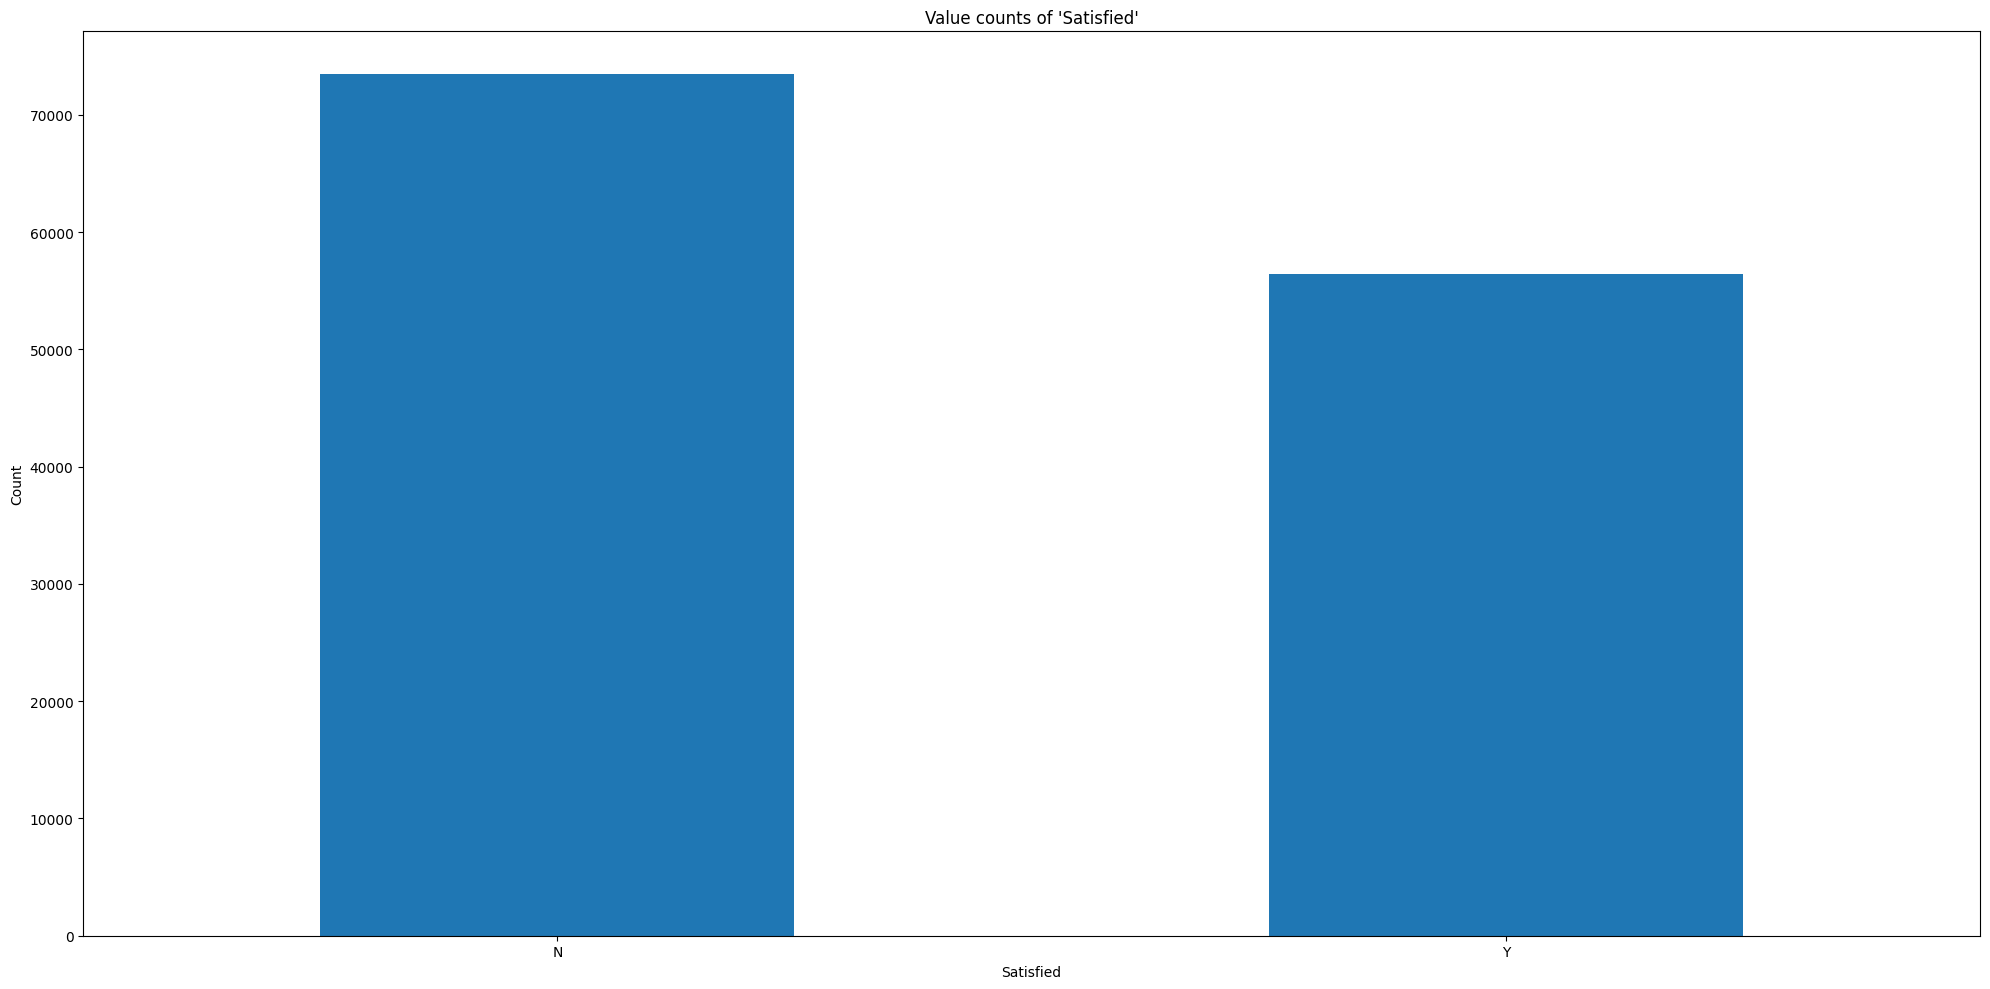

In [23]:
plt.figure(figsize=(20,10))
df_trains['Satisfied'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Satisfied'")
plt.xlabel("Satisfied")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

There are more 'No' than 'Yes' answering the satisfaction of the clients.

### Insights of *Work or leisure*

In [24]:
df_trains['Work or Leisure'].value_counts() 

work       89693
leisure    40187
Name: Work or Leisure, dtype: int64

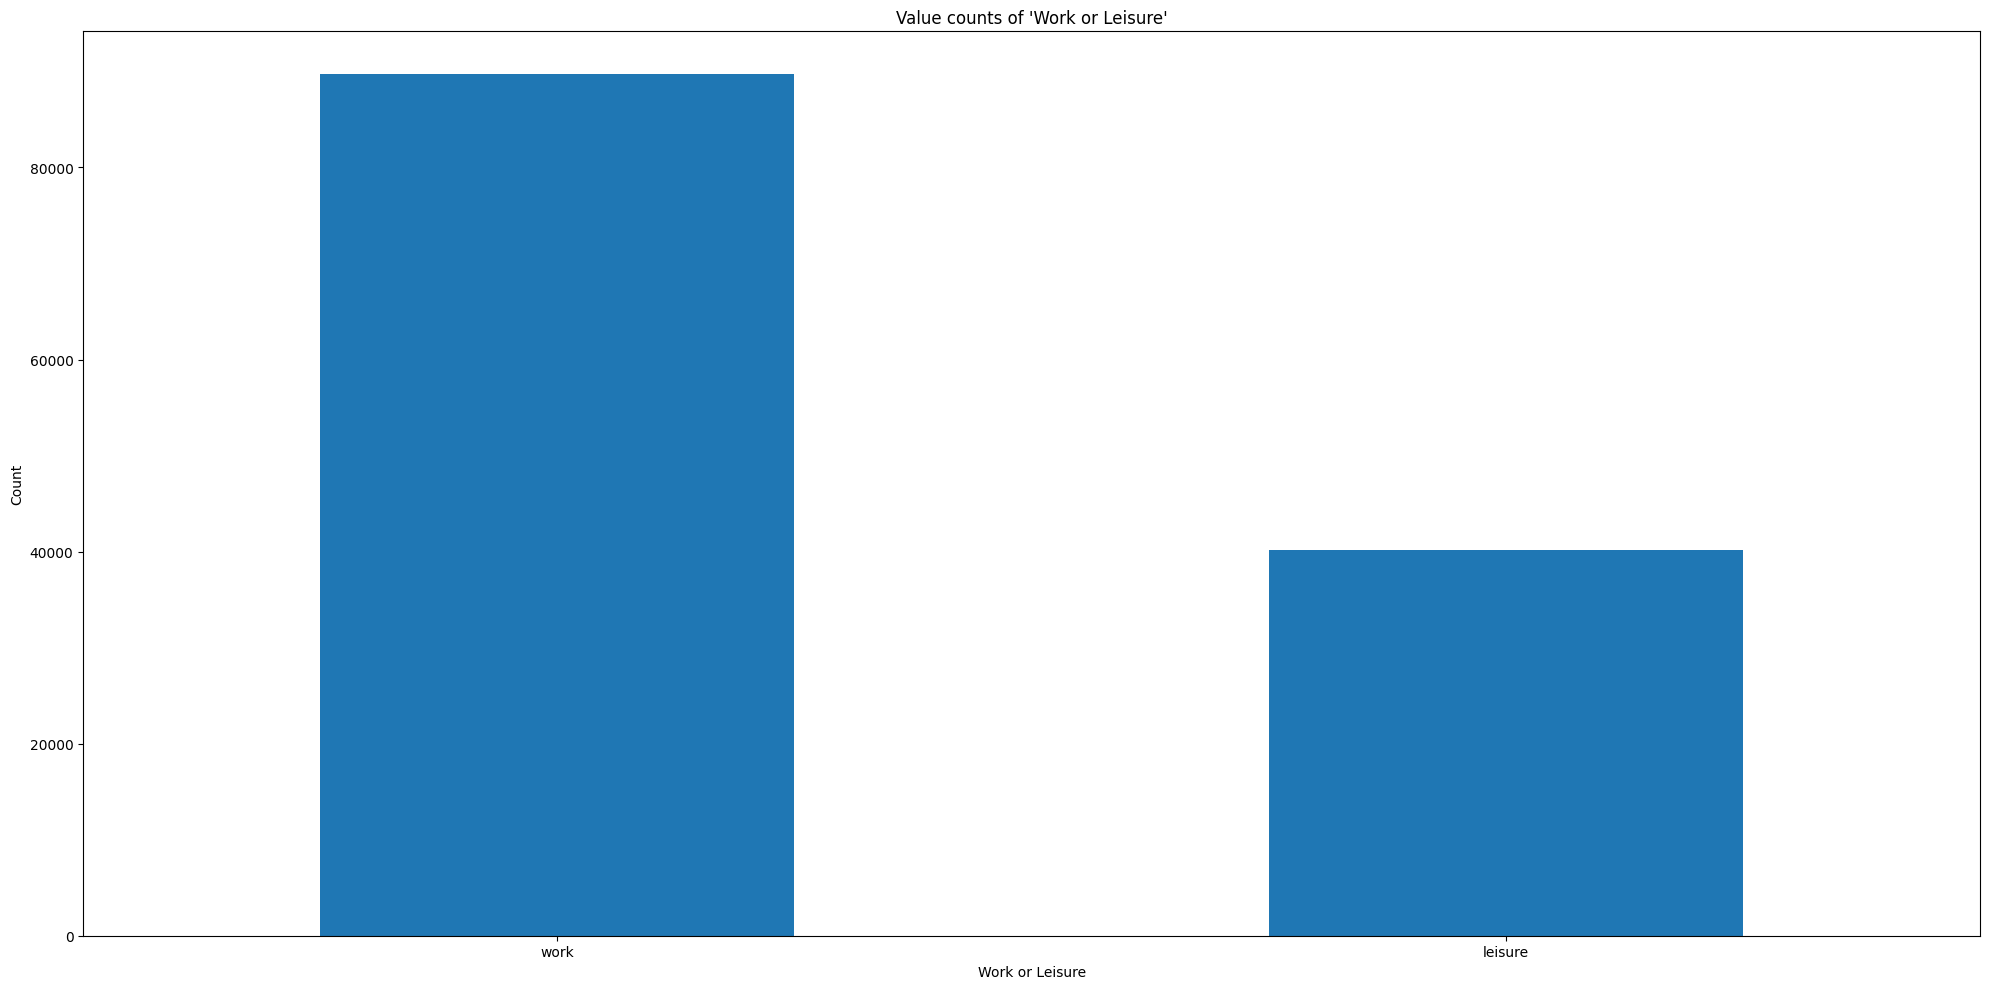

In [25]:
plt.figure(figsize=(20,10))
df_trains['Work or Leisure'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Work or Leisure'")
plt.xlabel("Work or Leisure")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

'work' is the most frequent answer.

### 1.7) Insights on numerical variables

Since we're focusing on numerical variables, it is possible to compute correlation. In order to achieve such goal we will use the *.corr()* function. 

In [26]:
#df_trains.corr()

We are interested in generating a plot for each numerical variable. Recall that the dataset consists of 19 numerical variables, hence, we get to 19 numerical variables of interest. The idea is to generate 17 subplots.

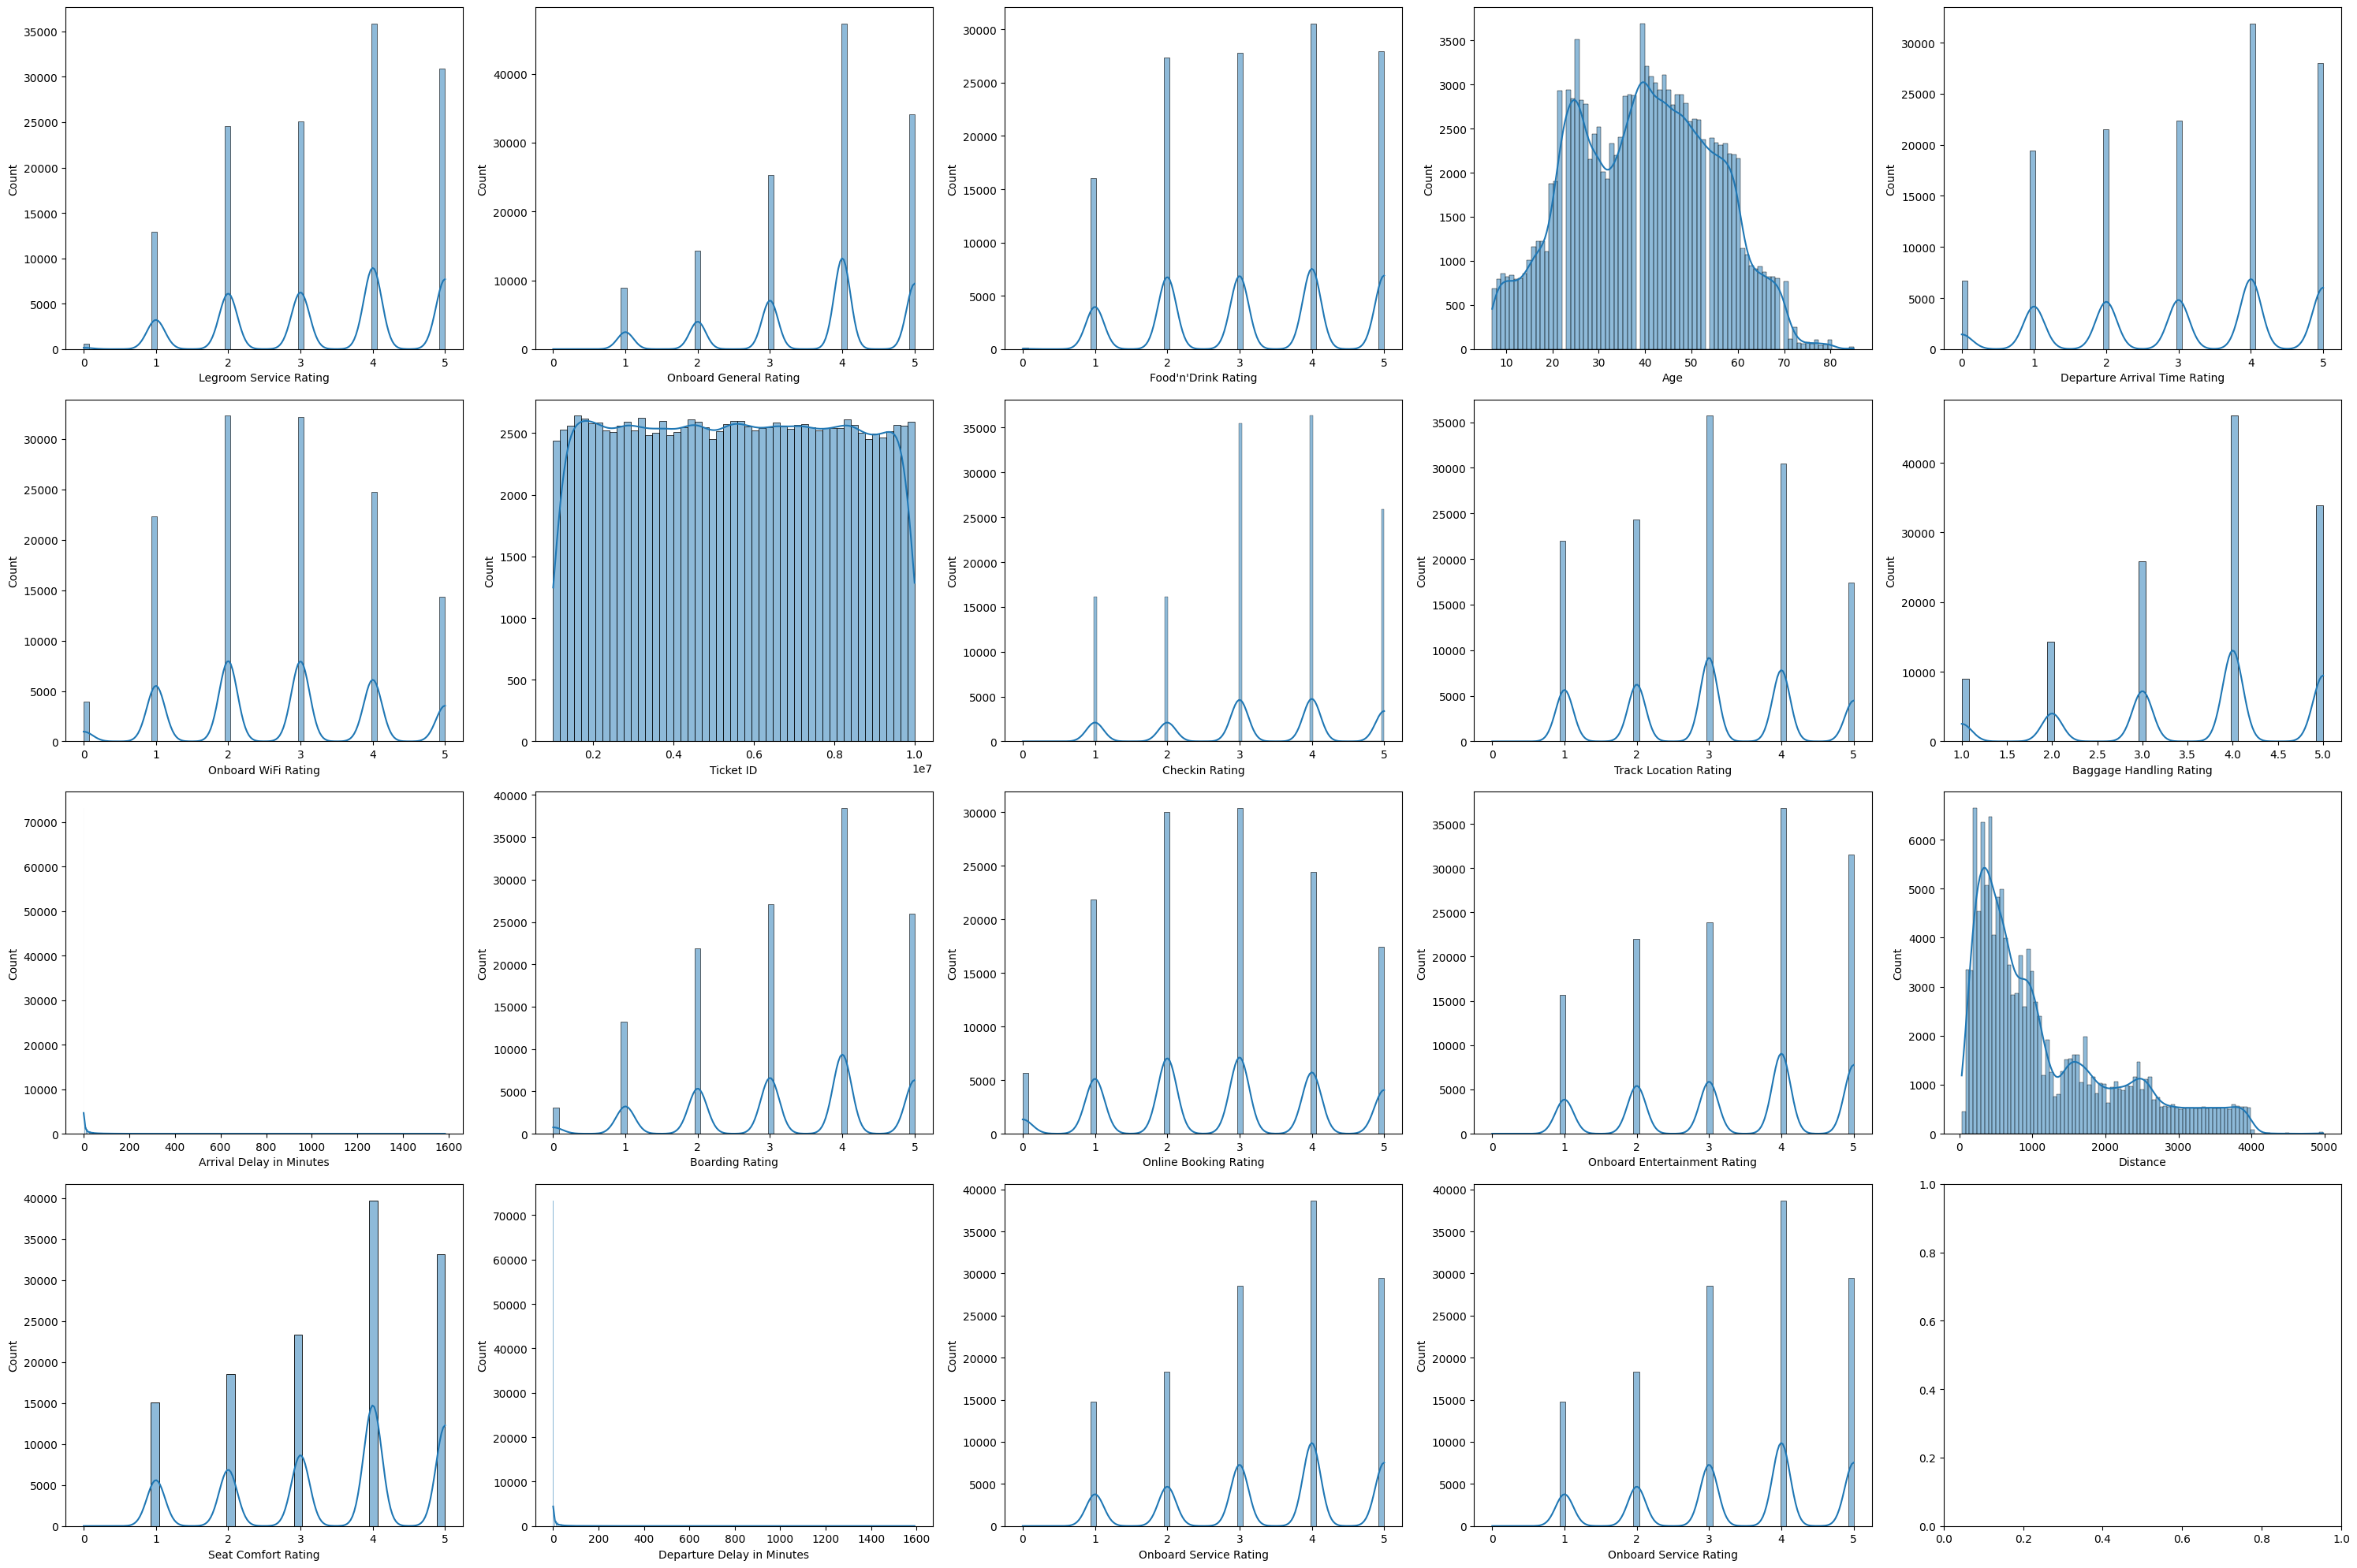

In [27]:
fig, axes = plt.subplots(4,5, figsize=(30,20))
sns.histplot(ax=axes[0, 0], data=df_trains, x='Legroom Service Rating', kde=True)
sns.histplot(ax=axes[0, 1], data=df_trains, x='Onboard General Rating', kde=True)
sns.histplot(ax=axes[0, 2], data=df_trains, x="Food'n'Drink Rating", kde=True)
sns.histplot(ax=axes[0, 3], data=df_trains, x='Age', kde=True)
sns.histplot(ax=axes[0, 4], data=df_trains, x='Departure Arrival Time Rating', kde=True)
sns.histplot(ax=axes[1, 0], data=df_trains, x='Onboard WiFi Rating', kde=True)
sns.histplot(ax=axes[1, 1], data=df_trains, x='Ticket ID', kde=True)
sns.histplot(ax=axes[1, 2], data=df_trains, x='Checkin Rating', kde=True)
sns.histplot(ax=axes[1, 3], data=df_trains, x='Track Location Rating', kde=True)
sns.histplot(ax=axes[1, 4], data=df_trains, x='Baggage Handling Rating', kde=True)
sns.histplot(ax=axes[2, 0], data=df_trains, x='Arrival Delay in Minutes', kde=True)
sns.histplot(ax=axes[2, 1], data=df_trains, x='Boarding Rating', kde=True)
sns.histplot(ax=axes[2, 2], data=df_trains, x='Online Booking Rating', kde=True)
sns.histplot(ax=axes[2, 3], data=df_trains, x='Onboard Entertainment Rating', kde=True)
sns.histplot(ax=axes[2, 4], data=df_trains, x='Distance', kde=True)
sns.histplot(ax=axes[3, 0], data=df_trains, x='Seat Comfort Rating', kde=True)
sns.histplot(ax=axes[3, 1], data=df_trains, x='Departure Delay in Minutes', kde=True)
sns.histplot(ax=axes[3, 2], data=df_trains, x='Onboard Service Rating', kde=True)
sns.histplot(ax=axes[3, 3], data=df_trains, x='Onboard Service Rating', kde=True)


plt.tight_layout()

In order visualize the histogram of one variable only, pass its name as parameter of the following function.

In [28]:
def histogram(var_name):
    plt.figure(figsize=(15,10))
    sns.histplot(data=df_trains, x=var_name, kde=True)
    plt.title("Histogram of " + var_name)

# 2) Preprocessing

Preprocessing phase is one of the most important ones when creating machine learning models. It usually consists of the following stages:

1. Handling missing values
2. Inspecting for redundancy
3. Column cleanup
4. Removing outliers

### 2.1) Handling missing values

We have already covered point 1 in the previous scetion (EDA). In particular, we have replaced all the missing rows of each attribute with its mode. 

### 2.2) Inspecting for redundancy

C:\Users\miche\AppData\Local\Temp\ipykernel_6536\3801656075.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_trains.corr()


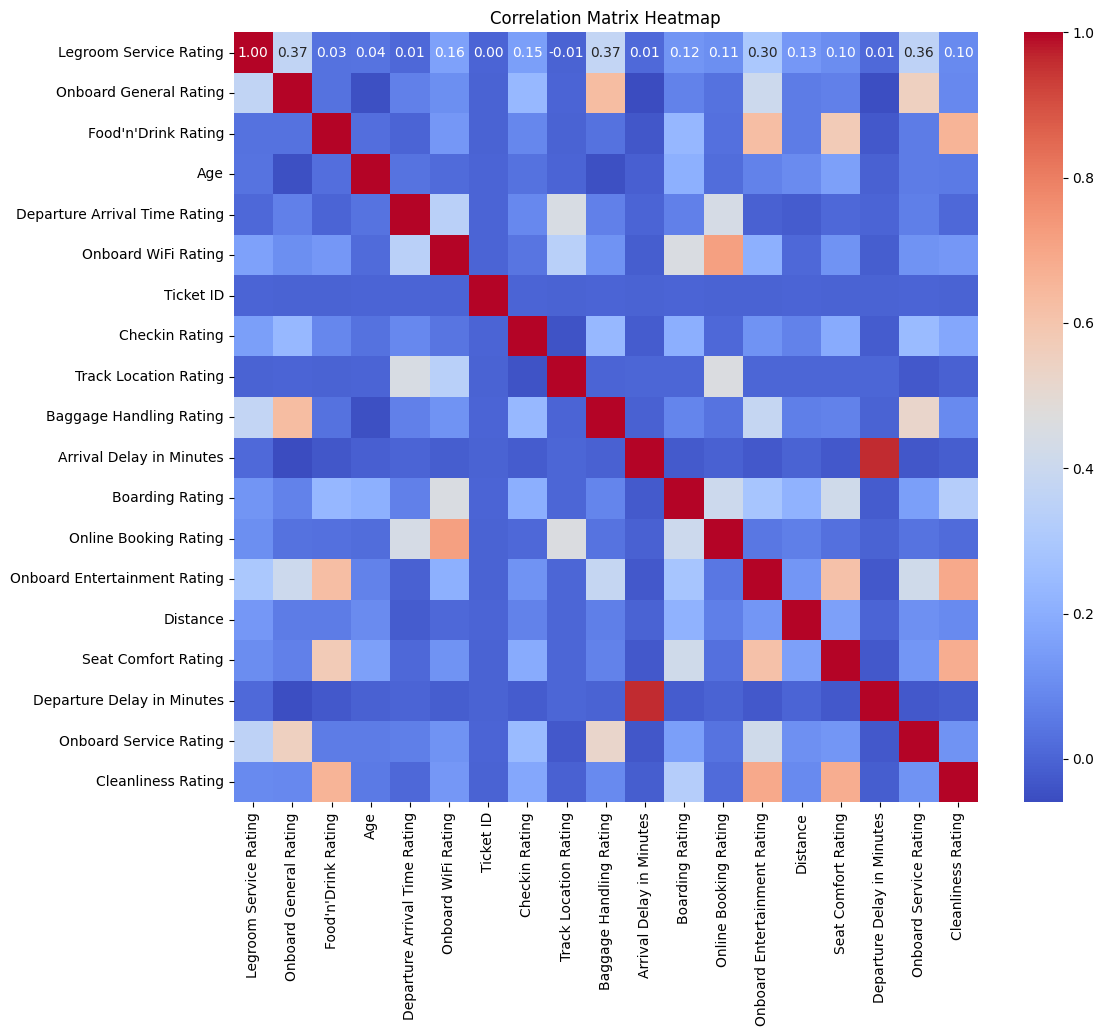

In [29]:
# Calculate correlation matrix
correlation_matrix = df_trains.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


### Which are the most correlated features?

In [67]:
# Calculate correlation matrix
correlation_matrix = df_trains.corr().abs()

# Unstack and sort the correlations in descending order
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)

# Filter out diagonal (same feature) and pairs with value 1.0 (perfect correlation)
filtered_correlations = sorted_correlations[(sorted_correlations < 1) & (sorted_correlations > 0)]

# Print the top N most correlated feature pairs and their correlations
top_correlations = filtered_correlations.head(10)  # Change the number to get more or fewer pairs
print("Most correlated feature pairs:")
for idx, correlation in top_correlations.items():
    print(f"{idx} with correlation {correlation}")


C:\Users\miche\AppData\Local\Temp\ipykernel_6536\4024494964.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_trains.corr().abs()


Most correlated feature pairs:
('departure delay in minutes', 'arrival delay in minutes') with correlation 0.9593823533648729
('arrival delay in minutes', 'departure delay in minutes') with correlation 0.9593823533648729
('online booking rating', 'onboard wifi rating') with correlation 0.7148068486610194
('onboard wifi rating', 'online booking rating') with correlation 0.7148068486610194
('cleanliness rating', 'onboard entertainment rating') with correlation 0.6925105378478508
('onboard entertainment rating', 'cleanliness rating') with correlation 0.6925105378478508
('cleanliness rating', 'seat comfort rating') with correlation 0.6796130028766091
('seat comfort rating', 'cleanliness rating') with correlation 0.6796130028766091
("food'n'drink rating", 'cleanliness rating') with correlation 0.6580539298388816
('cleanliness rating', "food'n'drink rating") with correlation 0.6580539298388816


We drop the features with the highest correlation values. We set the trashold at 0.7.

In [69]:
# Define the correlation threshold
threshold = 0.7

# Create a mask to identify highly correlated columns
high_corr_columns = []
for i in range(len(correlation_matrix)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            if colname not in high_corr_columns:
                high_corr_columns.append(colname)

# Find column names to drop
columns_to_drop = [col for col in high_corr_columns]
print(f"Columns to dropped: {columns_to_drop}")

# Drop the identified columns from the DataFrame
df_trains_filtered = df_trains.drop(columns=columns_to_drop)

# Check the resulting DataFrame after dropping highly correlated columns

print(f"Original DataFrame: {df_trains.shape}")
print(f"Filtered DataFrame: {df_trains_filtered.shape}")
df_trains_filtered.head()


Columns to dropped: ['online booking rating', 'departure delay in minutes']
Original DataFrame: (129880, 25)
Filtered DataFrame: (129880, 23)


,legroom service rating,onboard general rating,food'n'drink rating,age,departure arrival time rating,onboard wifi rating,ticket id,checkin rating,track location rating,baggage handling rating,...,gender,boarding rating,satisfied,onboard entertainment rating,date and time,distance,seat comfort rating,work or leisure,onboard service rating,cleanliness rating
0,3,5,5,13,4,3,4718594,4,1,4,...,M,3,N,5,2016-02-19 10:53,460,5,leisure,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,M,3,N,1,2016-02-26 15:39,235,1,work,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,F,5,Y,5,2016-02-26 07:26,1142,5,work,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,F,2,N,2,2016-02-27 08:32,562,2,work,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,M,5,Y,3,2016-02-27 14:37,214,5,work,3,3


### 2.3) Column cleanup

In [32]:
# Convert all the variables' names into lower case.
df_trains.columns = [col.lower() for col in df_trains]

### 2.4) Removing outliers

### - Creating boxplots

In [33]:
# fig, axes = plt.subplots(3,5, figsize=(30,20))

# sns.boxplot(ax=axes[0, 0], data=df_trains, x='legroom service rating')
# sns.boxplot(ax=axes[0, 1], data=df_trains, x='onboard general rating')
# sns.boxplot(ax=axes[0, 2], data=df_trains, x="food'n'drink rating")
# sns.boxplot(ax=axes[0, 3], data=df_trains, x='age')
# sns.boxplot(ax=axes[0, 4], data=df_trains, x='departure arrival time rating')
# sns.boxplot(ax=axes[1, 0], data=df_trains, x='onboard wifi rating')
# sns.boxplot(ax=axes[1, 2], data=df_trains, x='ticket id')
# sns.boxplot(ax=axes[0, 0], data=df_trains, x='checkin rating')
# sns.boxplot(ax=axes[0, 1], data=df_trains, x='track location rating')
# sns.boxplot(ax=axes[0, 2], data=df_trains, x='baggage handling rating')
# sns.boxplot(ax=axes[0, 3], data=df_trains, x='arrival delay in minutes')
# sns.boxplot(ax=axes[0, 4], data=df_trains, x='boarding rating')
# sns.boxplot(ax=axes[1, 0], data=df_trains, x='online booking rating')
# sns.boxplot(ax=axes[1, 2], data=df_trains, x='onboard entertainment rating')
# sns.boxplot(ax=axes[0, 2], data=df_trains, x='distance')
# sns.boxplot(ax=axes[0, 3], data=df_trains, x='seat comfort rating')
# sns.boxplot(ax=axes[0, 4], data=df_trains, x='departure delay in minutes')
# sns.boxplot(ax=axes[1, 0], data=df_trains, x='onboard service rating')
# sns.boxplot(ax=axes[1, 2], data=df_trains, x='onboard service rating')

### - Two-steps approach to remove outliers

In [70]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25) #first quantile
    Q3 = df[ft].quantile(0.75) #second quantile
    IQR = Q3 - Q1 #interquantile range

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)] # stores the indexes of the outliers, hence all values either < lower bound
                                                                    # or > upper bound
    return ls

We now create an empty list to store the output indexes from multiple columns.

In [71]:
index_list = []

#extract outliers from all the columns
columns = ['legroom service rating', 'onboard general rating', "food'n'drink rating", 'age', 'departure arrival time rating', 'onboard wifi rating', 'ticket id', 'checkin rating', 'track location rating', 'baggage handling rating', 'arrival delay in minutes', 'boarding rating', 'online booking rating', 'onboard entertainment rating', 'distance', 'seat comfort rating', 'departure delay in minutes', 'onboard service rating']
for column in columns:
    index_list.extend(outliers(df_trains, column))

#to visualize such list:
#index_list

In [72]:
def remove(df, ls):

    #process the list of indexes, since it may be not sorted or not unique
    ls = sorted(set(ls))

    df = df.drop(ls) # dropping rows containing outliers

    return df

We now define a function called "remove" which returns a cleaned dataframe without outliers.

In [86]:
# calling the function to remove the outliers
data_df_cleaned = remove(df_trains_filtered, index_list)

#checking the shape of the new dataframe
print(df_trains.shape)
print(data_df_cleaned.shape)

(129880, 25)
(93648, 23)


# 3) Generating training set and test set


### 3.1) Distinct categorical and numerical columns

In [88]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
data = data_df_cleaned.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)
for column in categorical_columns:
    if column == 'satisfied':
        categorical_columns.remove(column)
print('numerical columns: ',(numerical_columns))
print('categorical columns: ',(categorical_columns))
#data

numerical columns:  ['onboard general rating', "food'n'drink rating", 'age', 'departure arrival time rating', 'onboard wifi rating', 'ticket id', 'checkin rating', 'track location rating', 'baggage handling rating', 'arrival delay in minutes', 'boarding rating', 'onboard entertainment rating', 'distance', 'seat comfort rating', 'onboard service rating']
categorical columns:  ['ticket class', 'loyalty', 'gender', 'date and time', 'work or leisure']


### 3.2) LabelEncoder

The LabelEncoder in scikit-learn is primarily used for encoding categorical (non-numeric) data into numerical labels. Its main purpose is to transform categorical labels into ordinal integers.



In [89]:
from sklearn.preprocessing import LabelEncoder
data_df_cleaned['ticket class'] = LabelEncoder().fit_transform(data_df_cleaned['ticket class'])
data_df_cleaned['loyalty'] = LabelEncoder().fit_transform(data_df_cleaned['loyalty'])
data_df_cleaned['gender'] = LabelEncoder().fit_transform(data_df_cleaned['gender'])
data_df_cleaned['satisfied'] = LabelEncoder().fit_transform(data_df_cleaned['satisfied'])
data_df_cleaned['date and time'] = LabelEncoder().fit_transform(data_df_cleaned['date and time'])
data_df_cleaned['work or leisure'] = LabelEncoder().fit_transform(data_df_cleaned['work or leisure'])

### 3.3) StandardScaler and OneHotEncoder


Both StandardScaler and OneHotEncoder are preprocessing techniques used in machine learning to prepare data for modeling. They serve different purposes:

- StandardScaler is used for standardizing numerical features by scaling them to have mean 0 and variance 1;
- OneHotEncoder is used for converting categorical variables into a binary matrix format.

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers = [
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [41]:
# correlation matrix
# corr = data_df_cleaned.corr()
# corr

In [42]:
# heatmap
# plt.figure(figsize=(20,10))
# sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
# plt.show()


### 3.4) Split the dataset

Now we generate a training set containing 75% of the observations and a test set containing the remaining 25%.

In [43]:
# Separate the features and the target variable
#X = df_trains.drop(['Satisfied'], axis=1)
#y = df_trains['Satisfied']
# Split the dataset into train and test sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [91]:
X = data_df_cleaned.drop(columns=['satisfied'])
print(X.columns)
y = data_df_cleaned['satisfied']  # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  # 75% training, 25% testing

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape)

Index(['legroom service rating', 'onboard general rating',
       'food'n'drink rating', 'age', 'departure arrival time rating',
       'onboard wifi rating', 'ticket id', 'checkin rating',
       'track location rating', 'baggage handling rating',
       'arrival delay in minutes', 'ticket class', 'loyalty', 'gender',
       'boarding rating', 'onboard entertainment rating', 'date and time',
       'distance', 'seat comfort rating', 'work or leisure',
       'onboard service rating', 'cleanliness rating'],
      dtype='object')
X_train shape: (70236, 22)
X_test shape: (23412, 22)


### 3.5) Fit and Transform

Now we apply *fit_transform* on the training set and  *transform* on the test set.


In [92]:
X = data_df_cleaned.drop(columns=['satisfied'])
y = data_df_cleaned['satisfied']


In [93]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# # Assuming 'numerical_cols' and 'categorical_cols' contain the column names for numerical and categorical data

# numerical_cols=numerical_columns
# categorical_cols = categorical_columns
# # Preprocessing for numerical data
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

# # Preprocessing for categorical data
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# # Bundle preprocessing for numerical and categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)])

# # Fit and transform on training data
# X_train = preprocessor.fit_transform(X_train)

# # Transform test data
# X_test = preprocessor.transform(X_test)


# 4) Classifiers testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.627883136852896


In [ ]:
from sklearn.svm import SVC 
from sklearn import neighbors
#from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score
import time 

### Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define random parameter distributions for randomized search
#param_dist = {'C': uniform(loc=0, scale=10), 'gamma': uniform(loc=0, scale=1), 'kernel': ['rbf', 'linear']}

# Create RandomizedSearchCV object with the classifier and parameter distributions
#random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, cv=3)

# Fit the randomized search to the data
#random_search.fit(X_train, y_train)

# Get the best parameters and best score
#print("Best Parameters:", random_search.best_params_)
#print("Best Score:", random_search.best_score_)

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
#classifier.fit(X_train, y_train)

# Predicting the Test set results
#y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)

# Computing Accuracy, Precision, Recall and F1 Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#print("Accuracy =", accuracy_score(y_test,y_pred))
#print("Precision =", precision_score(y_test,y_pred))
#print("Recall =", recall_score(y_test,y_pred))

In [ ]:
data_df_cleaned.corr()

,legroom service rating,onboard general rating,food'n'drink rating,age,departure arrival time rating,onboard wifi rating,ticket id,checkin rating,track location rating,baggage handling rating,...,online booking rating,satisfied,onboard entertainment rating,date and time,distance,seat comfort rating,work or leisure,departure delay in minutes,onboard service rating,cleanliness rating
legroom service rating,1.000000,0.373030,0.030117,0.045292,0.000299,0.156160,0.001457,0.122448,-0.002202,0.369099,...,0.119572,0.313230,0.300173,0.000786,0.142524,0.106629,0.162678,-0.006604,0.369105,0.094456
onboard general rating,0.373030,1.000000,0.026256,-0.064616,0.070434,0.098528,-0.002736,0.189316,0.000795,0.643250,...,0.041076,0.220526,0.403628,-0.004950,0.060203,0.056022,0.033381,-0.006347,0.575669,0.079074
food'n'drink rating,0.030117,0.026256,1.000000,0.023706,-0.002415,0.104577,-0.001283,0.056735,-0.000162,0.027712,...,0.022229,0.195326,0.636175,-0.000502,0.060880,0.579916,0.075094,-0.006187,0.049608,0.666557
age,0.045292,-0.064616,0.023706,1.000000,0.034616,0.012726,-0.003244,0.020704,0.003367,-0.059182,...,0.016245,0.138528,0.083449,0.007051,0.099967,0.178927,0.046396,-0.007691,0.050476,0.067124
departure arrival time rating,0.000299,0.070434,-0.002415,0.034616,1.000000,0.358946,-0.002869,0.075290,0.428940,0.063782,...,0.423031,-0.074133,-0.018113,0.001785,-0.025024,0.003630,-0.285346,-0.002351,0.062514,0.009346
onboard wifi rating,0.156160,0.098528,0.104577,0.012726,0.358946,1.000000,-0.000691,0.028261,0.362519,0.105398,...,0.748036,0.277998,0.186403,0.000864,0.011566,0.101377,0.111516,-0.017490,0.107269,0.112166
ticket id,0.001457,-0.002736,-0.001283,-0.003244,-0.002869,-0.000691,1.000000,-0.000788,-0.002824,-0.001130,...,-0.001766,-0.002636,-0.001296,0.000073,0.002522,-0.002025,-0.003916,0.002612,0.001986,-0.001383
checkin rating,0.122448,0.189316,0.056735,0.020704,0.075290,0.028261,-0.000788,1.000000,-0.034430,0.187362,...,0.001544,0.182724,0.094033,0.003085,0.053797,0.129221,-0.011531,-0.007215,0.202110,0.123362
track location rating,-0.002202,0.000795,-0.000162,0.003367,0.428940,0.362519,-0.002824,-0.034430,1.000000,-0.001778,...,0.447335,0.007245,0.008923,0.003082,0.013146,0.008168,0.034149,0.002091,-0.024097,-0.001491
baggage handling rating,0.369099,0.643250,0.027712,-0.059182,0.063782,0.105398,-0.001130,0.187362,-0.001778,1.000000,...,0.042795,0.227046,0.374406,0.001832,0.063120,0.063168,0.045954,-0.008637,0.541963,0.086177


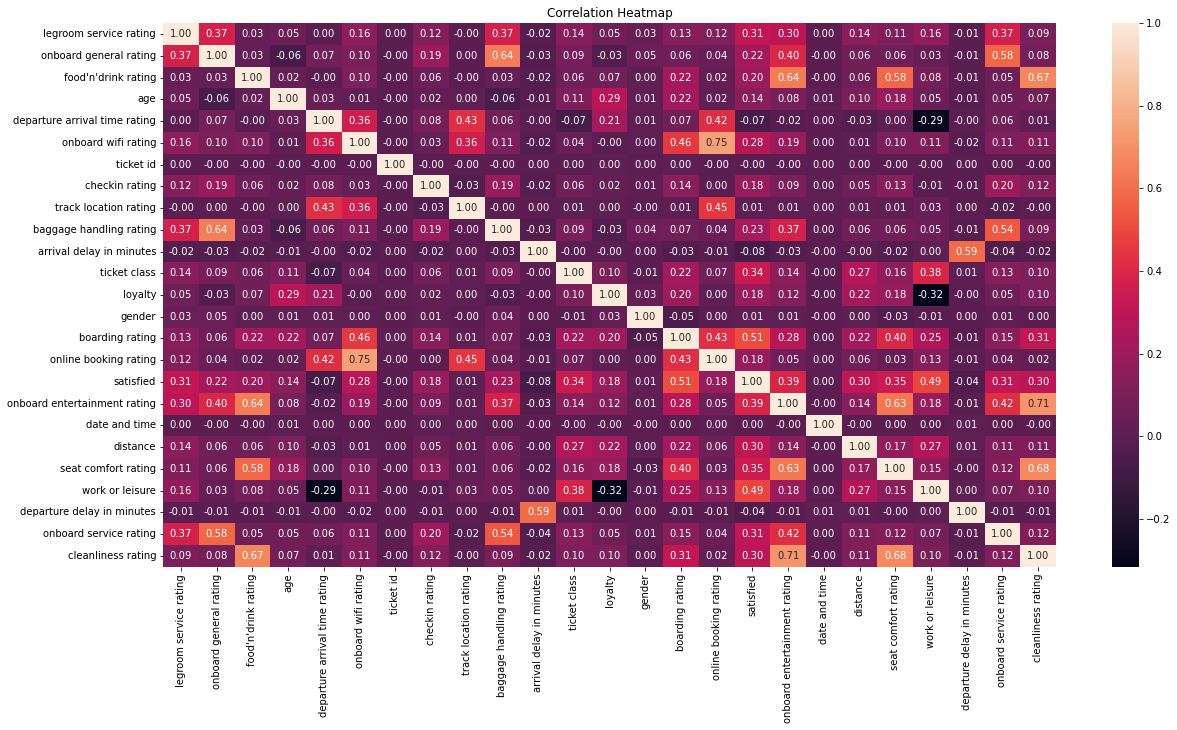

In [ ]:
# Heatmap
correlation_matrix = data_df_cleaned.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Initialize an empty list to store correlated feature pairs
correlated_features = []
correlation_matrix = data_df_cleaned.corr()


# Iterate through the correlation matrix to find the most correlated pairs
for column in correlation_matrix.columns:
    # Exclude diagonal (self-correlation) by setting the diagonal value to zero
    correlation_matrix.loc[column, column] = 0

  
    # Find the feature with the highest correlation for each column
    max_corr_feature = correlation_matrix[column].idxmax()
    correlated_features.append((column, max_corr_feature, correlation_matrix[column][max_corr_feature]))

correlated_features = sorted(correlated_features, key=lambda x: abs(x[2]), reverse=True) # Sort by correlation value in decreasing order

# Display the most correlated feature pairs and their correlation values
for feature_pair in correlated_features:
    print(f"Most correlated feature pair: {feature_pair[0]} & {feature_pair[1]} with correlation {feature_pair[2]}")


Most correlated feature pair: onboard wifi rating & online booking rating with correlation 0.7480359835566996
Most correlated feature pair: online booking rating & onboard wifi rating with correlation 0.7480359835566996
Most correlated feature pair: onboard entertainment rating & cleanliness rating with correlation 0.709792515761793
Most correlated feature pair: cleanliness rating & onboard entertainment rating with correlation 0.709792515761793
Most correlated feature pair: seat comfort rating & cleanliness rating with correlation 0.6769626161356102
Most correlated feature pair: food'n'drink rating & cleanliness rating with correlation 0.6665571266084745
Most correlated feature pair: onboard general rating & baggage handling rating with correlation 0.6432497952806008
Most correlated feature pair: baggage handling rating & onboard general rating with correlation 0.6432497952806008
Most correlated feature pair: arrival delay in minutes & departure delay in minutes with correlation 0.593

# ) Visualizing missing data

In [ ]:
import missingno as msno

In [ ]:
# Pairplots

# sns.pairplot(df_trains, vars=['Legroom Service Rating', 'Onboard General Rating', 'Departure Delay in Minutes', 'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Boarding Rating', 'Onboard Service Rating', 'Cleanliness Rating', 'Seat Comfort Rating', 'Onboard Entertainment Rating'])
# plt.suptitle("Pair Plots")
# plt.show()

<AxesSubplot:xlabel='Satisfied', ylabel='Age'>

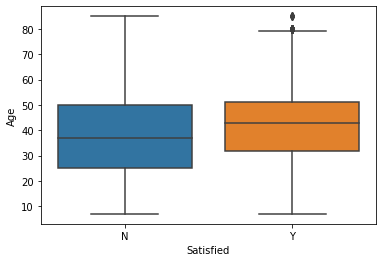

In [ ]:
# Boxplots

sns.boxplot(data=df_trains, x='Satisfied', y='Age')

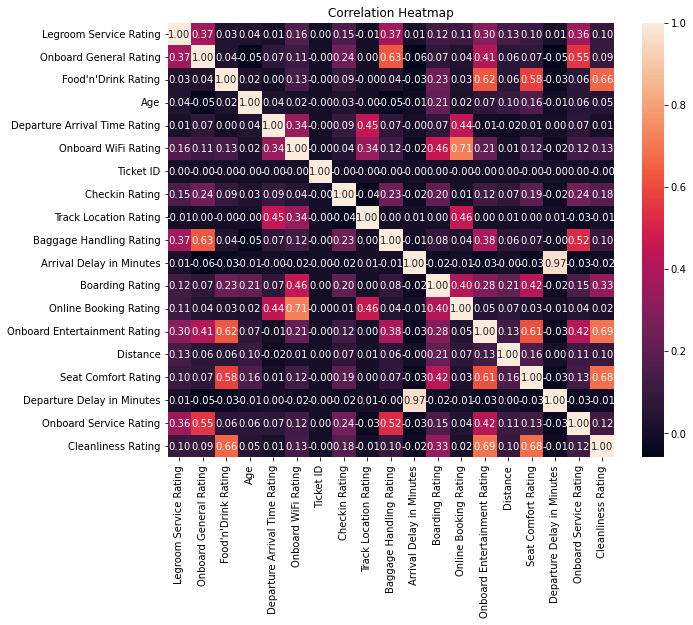

In [ ]:
# Heatmap
correlation_matrix = df_trains.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


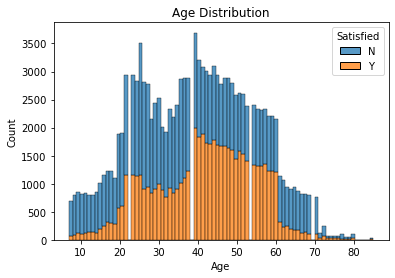

In [ ]:
#Histplot

sns.histplot(data=df_trains, x='Age', hue='Satisfied', multiple='stack')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


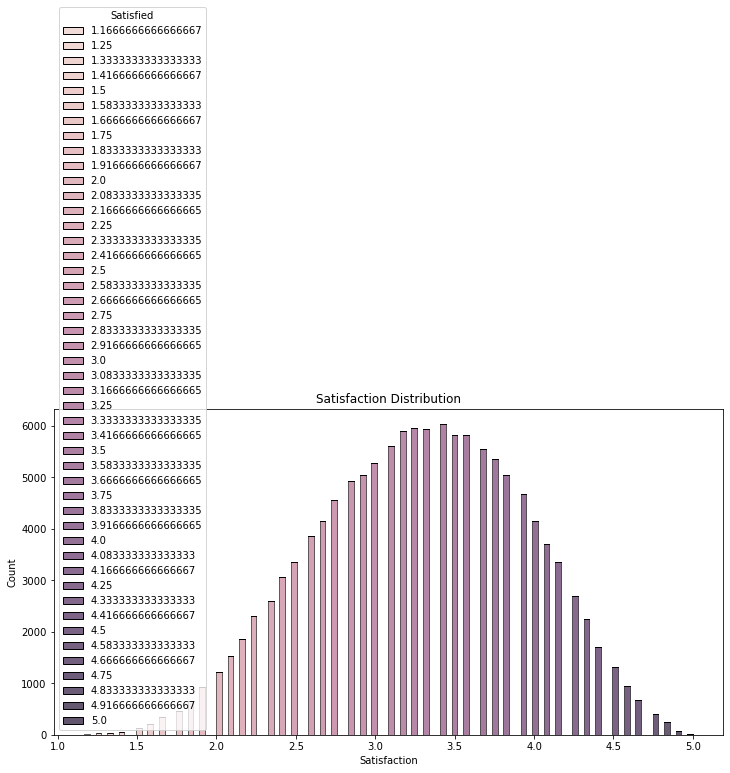

In [ ]:
# Feature engineering
df_trains['Satisfied'] = (df_trains['Legroom Service Rating'] + df_trains['Onboard General Rating'] + df_trains['Baggage Handling Rating'] + df_trains['Cleanliness Rating'] + df_trains['Checkin Rating'] + df_trains['Departure Arrival Time Rating'] + df_trains['Food\'n\'Drink Rating'] + df_trains['Onboard Entertainment Rating'] + df_trains['Onboard Service Rating'] + df_trains['Online Booking Rating'] + df_trains['Seat Comfort Rating'] + df_trains['Track Location Rating']) / 12

plt.figure(figsize=(12, 6))
sns.histplot(data=df_trains, x='Satisfied', hue='Satisfied', multiple='stack')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

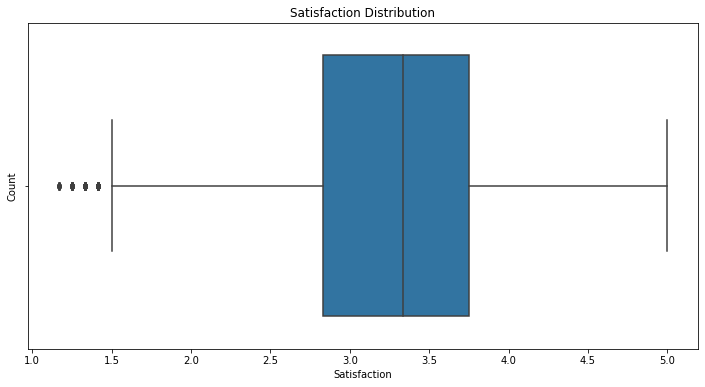

In [ ]:
# Feature engineering
df_trains['Satisfied'] = (df_trains['Legroom Service Rating'] + df_trains['Onboard General Rating'] + df_trains['Baggage Handling Rating'] + df_trains['Cleanliness Rating'] + df_trains['Checkin Rating'] + df_trains['Departure Arrival Time Rating'] + df_trains['Food\'n\'Drink Rating'] + df_trains['Onboard Entertainment Rating'] + df_trains['Onboard Service Rating'] + df_trains['Online Booking Rating'] + df_trains['Seat Comfort Rating'] + df_trains['Track Location Rating']) / 12

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_trains, x='Satisfied', hue='Satisfied')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

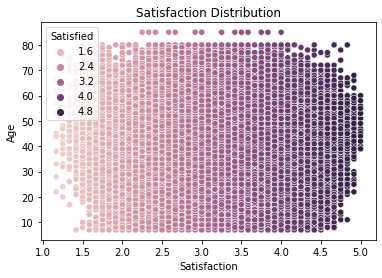

In [ ]:
# Scatterplot

sns.scatterplot(data=df_trains, x='Satisfied', y='Age', hue='Satisfied')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()

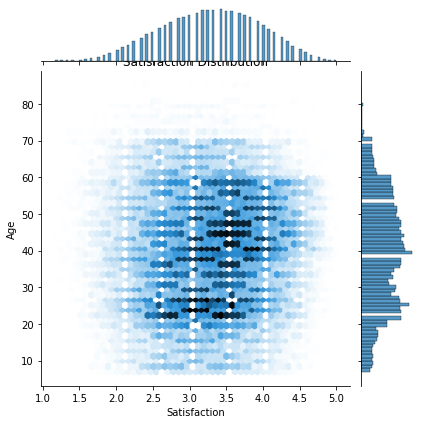

In [ ]:
# Jointplot

sns.jointplot(data=df_trains, x='Satisfied', y='Age', kind='hex')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()
